In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from pypackage.data_prepare import check_type_dt, data_info

from rich.console import Console
from rich.table import Table


### Etapas de la app

1. Se alimenta de un csv.

2. Se procesa el csv (convertirlo a indice temporal)

3. Se visualiza el estado procesado de las columnas (presentar tablas)

4. Se despliega un menu con las opciones de variable

5. Se solicita confirmacion de la variable seleccionada

6. Se corre la aplicacion

7. Se comenta respecto a las funcionalidad que aún están pendiente de desarrollarse.

8. Se consulta si se desea exportar la animación

9. Proximos avances threads

10. Anunciar la finalización del programa

In [2]:
## 1
file_name = input('File name: ')
if not file_name.endswith('csv'):
    file_name += '.csv'
try:
    data = pd.read_csv('data/' + file_name)
except:
    print('File not found')
    exit()

data 

,date,Grocery,Pharmaceutical,Natural Products,Packaged Meat,Meat,Bakery
0,2012-04-10,125.835760,349.128351,101.781519,162.662000,353.698462,161.637857
1,2012-04-11,146.691058,179.865346,101.030875,134.233186,222.319762,123.934848
2,2012-04-12,164.758837,195.612941,114.137453,188.202250,521.658136,158.606944
3,2012-04-13,152.669070,169.872827,106.682081,158.045183,521.257895,182.599318
4,2012-04-14,126.721540,198.341983,126.068018,168.083239,327.602143,125.618571
...,...,...,...,...,...,...,...
442,2013-06-26,112.263581,292.195754,103.016559,144.156222,223.138889,149.655882
443,2013-06-27,120.195221,222.045030,100.582025,162.264539,392.826829,151.791714
444,2013-06-28,130.841667,189.297044,87.684000,161.924259,228.294590,116.581364
445,2013-06-29,121.465289,187.911170,142.739619,170.365272,225.785143,107.375172


In [3]:
## 2
data = check_type_dt(data)
data = data.apply(lambda col: pd.to_numeric(col, errors='ignore'))
df_col = data_info(data)
df_col


Serie de tiempo: date



info de data,index,columna,Nan,pct_nan,dtype,count,pct_reg,count_unique
0,3,Packaged Meat,1,0.22,float64,446,99.78,446
1,4,Meat,1,0.22,float64,446,99.78,446
2,5,Bakery,1,0.22,float64,446,99.78,446
3,0,Grocery,0,0.00,float64,447,100.00,447
4,1,Pharmaceutical,0,0.00,float64,447,100.00,447
5,2,Natural Products,0,0.00,float64,447,100.00,447


In [4]:
## 3
table = Table(title="Data variables information: {} |\n shape: {}".format(file_name, data.shape))

table.add_column("id", justify="right", style="cyan", no_wrap=True)
table.add_column("Variable name", style="cyan")
table.add_column("type", justify="right", style="cyan")
table.add_column("unique", justify="right", style="cyan")
table.add_column("nans", justify="right", style="cyan")


id = pd.Series(list(range(1, data.shape[1]+1))).values.astype(str)
name = df_col['columna'].values.astype(str)
dtype = df_col['dtype'].values.astype(str)
unique = df_col['count_unique'].values.astype(str)
nan = df_col['Nan'].values.astype(str)

for i in range(len(df_col)):
    table.add_row(id[i], name[i], dtype[i], unique[i], nan[i])

console = Console()
console.print(table)

 Data variables information: data-example-2.csv |  
                  shape: (447, 6)                  
┏━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┓
┃ id ┃ Variable name    ┃    type ┃ unique ┃ nans ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━┩
│  1 │ Packaged Meat    │ float64 │    446 │    1 │
│  2 │ Meat             │ float64 │    446 │    1 │
│  3 │ Bakery           │ float64 │    446 │    1 │
│  4 │ Grocery          │ float64 │    447 │    0 │
│  5 │ Pharmaceutical   │ float64 │    447 │    0 │
│  6 │ Natural Products │ float64 │    447 │    0 │
└────┴──────────────────┴─────────┴────────┴──────┘

In [5]:
## 4: se despliega un menu con las opciones de variables
print ('Press 0 to exit')

def animation_variable():
    def id_input():
        ani_id = input('Variable to visualize (select id): ')
        if not ani_id.isnumeric():
            print('Please select a number')
            exit()
        ani_id = int(ani_id)
        if ani_id > len(df_col):
            print('Please select a valid id')
            exit()
        if ani_id == 0:
            print('Bye')
            exit()
        return ani_id

    ani_id = id_input()
    label = df_col.iloc[ani_id-1, 1]
    ani_var = data[label]
    return ani_var

ani_var = animation_variable()

Press 0 to exit


In [6]:
## 5: confirmacion
def confirmation():
    print('Variable selected: {}'.format(ani_var.name))
    from pypackage.ingresar_datos import ingreso_bool

    print ('Confirmar variable?')
    confirmar = ingreso_bool()

    if confirmar == True:
        print('Variable confirmada CORRER ANIMACION')
    else:
        print('Variable no confirmada')
        exit()
    return confirmar

confirmation()

Variable selected: Grocery
Confirmar variable?
< 1: Si >    < 0: No >

Variable confirmada CORRER ANIMACION


True

In [16]:
## 6) Se corre la aplicacion
from pypackage.data_feed import build_frames


dx = build_frames(ani_var.reset_index(), ani_var.reset_index().columns[0])

dxt = pd.to_datetime(dx.iloc[-1])

hours = dxt.dt.time.apply(lambda t: t.hour)
minutes = dxt.dt.time.apply(lambda t: t.minute)
seconds = dxt.dt.time.apply(lambda t: t.second)

days = dxt.dt.day
months = dxt.dt.month
years = dxt.dt.year

fechas = False
if all(h == 0 and m == 0 and s == 0 for h, m, s in zip(hours, minutes, seconds)):
    print("Las horas, minutos y segundos son insignificantes")
    dx = dx.replace(0, pd.Timestamp('00:00:00')).applymap(lambda x: x.to_pydatetime().strftime('%d-%m-%Y'))
    fechas = True
elif len(days.unique()) == 1 and len(months.unique()) == 1 and len(years.unique()) == 1:
    print ('las fechas son iguales')
    if any(hours):
        print("El eje x dinámico no contempla horas")
    dx = dx.replace(0, pd.Timestamp('00:00:00')).applymap(lambda x: x.to_pydatetime().strftime('%M:%S'))
else:
    print("El dataframe posee variación tanto en sus fechas, como en el tiempo, y el eje x dinámico no ha sido desarrollado para ese escenario.\nSaliendo del programa")
    exit()

df = build_frames(ani_var.to_frame(), ani_var.name)

Las horas, minutos y segundos son insignificantes


In [35]:
i = 100

date = dx.iloc[i]
frame = df.iloc[i]

index_min = int(date[frame !=0].index[0])
eje_x = date.loc[:str(int(index_min)-1)].index.to_list() + date.iloc[int(index_min):].to_list()
frame.index = eje_x



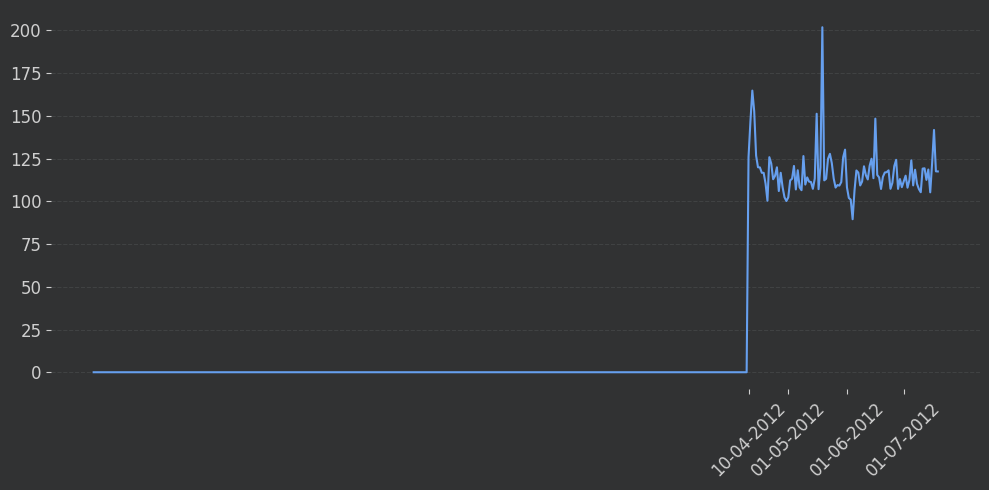

In [42]:
from pypackage.data_feed import apply_dark_mode
# apply_dark_mode()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(frame)

def axis_time():
    if i < 180:
        ax.set_xticks(eje_x[-1])
    elif i < 600:
        lista_eje_x = []
        lista_eje_x.append(eje_x[-181])
        lista_eje_x.append(eje_x[-1])
        ax.set_xticks(lista_eje_x)
    else:
        lista_eje_x = []
        lista_eje_x.append(eje_x[-181])
        lista_eje_x.append(eje_x[-1])
        lista_eje_x.append(eje_x[-i-1])
        lista_eje_x.append(eje_x[-len(eje_x[-i-1:-180])//2-180])
        ax.set_xticks(lista_eje_x)

def axis_date():
    lista_eje_x = []
    mes_anterior = None
    for ix, fecha in enumerate(eje_x):
        fecha_split = fecha.split('-')
        if len(fecha_split) < 2:
            continue
        mes_actual = int(fecha_split[1])
        if mes_actual != mes_anterior:
            lista_eje_x.append(ix)
        mes_anterior = mes_actual

    ax.set_xticks(lista_eje_x)
    ax.tick_params(axis='x', labelrotation=45)


if fechas == True:
    axis_date()
else:
    axis_time()


plt.tight_layout()


plt.show();

In [36]:
eje_x

mes_anterior = None
for ix, fecha in enumerate(eje_x):
    fecha_split = fecha.split('-')
    if len(fecha_split) < 2:
        continue
    mes_actual = int(fecha_split[1])
    if mes_actual != mes_anterior:
        print(f"El mes ha cambiado en el índice {ix}")
    mes_anterior = mes_actual

El mes ha cambiado en el índice 346
El mes ha cambiado en el índice 367
El mes ha cambiado en el índice 398
El mes ha cambiado en el índice 428


In [43]:
ani_var

date
2012-04-10    125.835760
2012-04-11    146.691058
2012-04-12    164.758837
2012-04-13    152.669070
2012-04-14    126.721540
                 ...    
2013-06-26    112.263581
2013-06-27    120.195221
2013-06-28    130.841667
2013-06-29    121.465289
2013-06-30    110.923770
Name: Grocery, Length: 447, dtype: float64

In [10]:
import sys

sys.exit(0)

import pandas as pd

# Crear un DataFrame de ejemplo
df = pd.DataFrame({
    'timestamp': [
        pd.Timestamp('2012-04-11T00:00:00.000000000'),
        pd.Timestamp('2012-04-12T12:34:56.000000000'),
        pd.Timestamp('2012-04-13T23:59:59.999999999')
    ]
})

# Obtener los valores de hora, minutos y segundos de cada Timestamp
hours = df['timestamp'].dt.time.apply(lambda t: t.hour)
minutes = df['timestamp'].dt.time.apply(lambda t: t.minute)
seconds = df['timestamp'].dt.time.apply(lambda t: t.second)

# Verificar si los valores son todos cero o no
if all(h == 0 and m == 0 and s == 0 for h, m, s in zip(hours, minutes, seconds)):
    print("Las horas, minutos y segundos son insignificantes")
else:
    print("Las horas, minutos y segundos no son insignificantes")


SystemExit: 0

c:\Users\Agustin\zz\portfolio\projects\Desk APPs\AnimationsGIF_Desk\appV2\venv\Lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
dx = dx.replace(0, pd.Timestamp('00:00:00').floor('s')).applymap(lambda x: x.to_pydatetime().strftime('%M:%S'))
dx

,0,1,2,3,4,5,6,7,8,9,...,437,438,439,440,441,442,443,444,445,446
0,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00
1,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00
2,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00
3,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00
4,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00
443,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00
444,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00
445,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00


In [ ]:
print ('Hola mundo!')

Hola mundo!


In [ ]:
import sys
sys.exit(0)

import threading
import time

def tarea_lenta():
    print("Tarea lenta empezando")
    time.sleep(22)  # espera 22 segundos
    print("Tarea lenta terminada")

def tarea_rapida():
    print("Tarea rápida empezando")
    time.sleep(2)  # espera 2 segundos
    print("Tarea rápida terminada")

# crear y ejecutar los hilos
hilo_tarea_lenta = threading.Thread(target=tarea_lenta)
hilo_tarea_rapida = threading.Thread(target=tarea_rapida)
hilo_tarea_lenta.start()
hilo_tarea_rapida.start()

# esperar a que ambos hilos terminen
hilo_tarea_lenta.join()
hilo_tarea_rapida.join()

print("Ambas tareas han terminado")

Tarea lenta empezando
Tarea rápida empezando
Tarea rápida terminada
Tarea lenta terminada
Ambas tareas han terminado
